In [1]:
from torch import nn
import torch
import gym
from collections import deque
import itertools
import numpy as np
import random
import torch.nn.functional as F
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# !nvidia-smi

Sat Apr  6 20:05:08 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:01:00.0 Off |                  Off |
|  0%   53C    P2             98W /  450W |    6955MiB /  24564MiB |     99%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
ENV_Name='Acrobot-v1'
torch.manual_seed(2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = gym.make(ENV_Name)
env.seed(0)
env.env.book_or_nips = 'nips'

/home/imaging/anaconda3/lib/python3.11/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/imaging/anaconda3/lib/python3.11/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/imaging/anaconda3/lib/python3.11/site-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


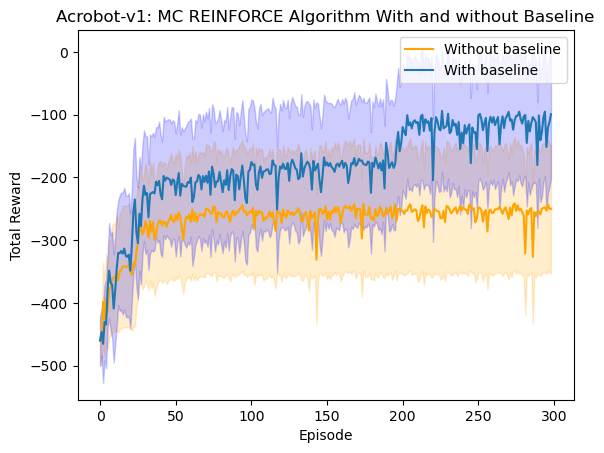

In [7]:
 # mean_rewards_without_baseline = np.mean(rewards_list_without_baseline, axis=0)
 #    std_rewards_without_baseline = np.std(rewards_list_without_baseline, axis=0)
# Mean_Flag = True
mean_Plot_array = []
# Q2_itertaion_0_Reinforce_Base_line_Acrobot-v1_
for k in range(5):
    file_name = f'./npy/Q2_itertaion_{k}_Reinforce_Base_line_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

# Mean_Flag = False
max_Plot_array = []
for k in range(5):
    file_name = f'./npy/Q2_itertaion_{k}_Reinforce_WithoutBase_line_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)
std_mean_scrs = np.std(mean_Plot_array, axis=0)

max_scrs = np.mean(max_Plot_array,axis = 0)
std_max_scrs = np.std(mean_Plot_array,axis= 0)



    # Plot mean rewards with different colors
plt.plot(mean_scrs, label='Without baseline', color='orange')
plt.plot(max_scrs, label='With baseline')

# Plot shaded regions for variance (mean +/- std) for both cases
plt.fill_between(range(len(mean_scrs)),
                 mean_scrs - std_mean_scrs/2,
                 mean_scrs + std_mean_scrs/2,
                 color='orange', alpha=0.2)

plt.fill_between(range(len(max_scrs)),
                 max_scrs - std_max_scrs/2,
                 max_scrs + std_max_scrs/2,
                 color='blue', alpha=0.2)

# Customize plot
plt.title("Acrobot-v1: MC REINFORCE Algorithm With and without Baseline")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.savefig('MC_Rein_Acrobot-std.png')
plt.show()